In [1]:
from sklearn import tree
from random import randint
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import MNIST
import os

In [2]:
clf_dtc = tree.DecisionTreeClassifier()

In [3]:
x_train_dtc = MNIST.x_train
y_train_dtc = MNIST.y_train
x_test_dtc = MNIST.x_test
y_test_dtc = MNIST.y_test

In [4]:
clf_dtc.fit(x_train_dtc, y_train_dtc)

DecisionTreeClassifier()

In [5]:
predicted_dtc = clf_dtc.predict(x_test_dtc)
expected_dtc = y_test_dtc

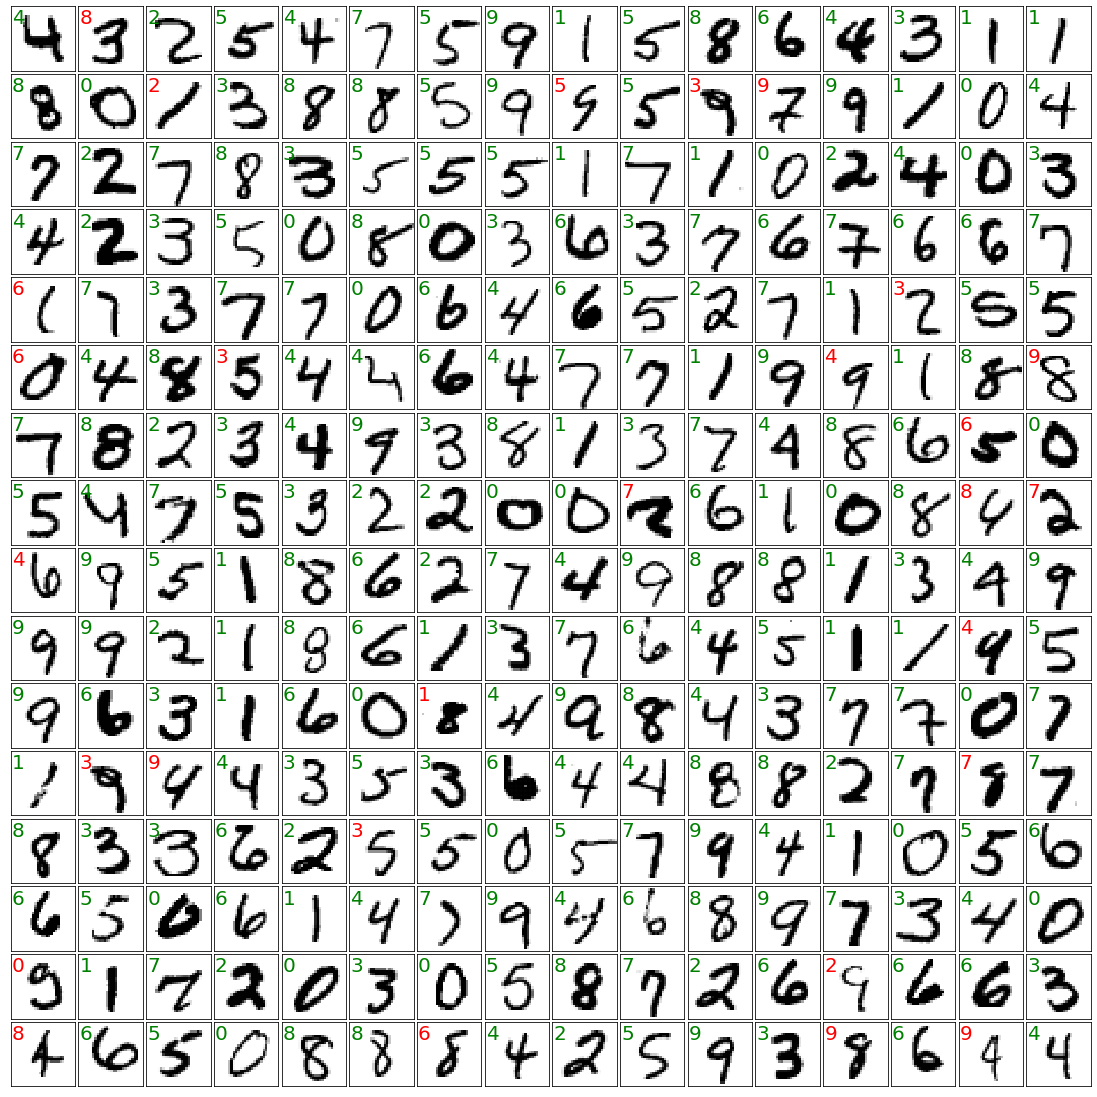

In [6]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_dtc) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_dtc.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_dtc[i] == expected_dtc[i]:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='red')

In [7]:
print(metrics.classification_report(expected_dtc, predicted_dtc))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.82      0.85      0.84      1010
           4       0.87      0.87      0.87       982
           5       0.83      0.83      0.83       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.80      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [8]:
d_dtc = [array for array in metrics.confusion_matrix(expected_dtc, predicted_dtc)]
data_matrix_dtc = {"0": d_dtc[0], "1": d_dtc[1], "2": d_dtc[2], "3": d_dtc[3], "4": d_dtc[4], \
                   "5": d_dtc[5], "6": d_dtc[6], "7": d_dtc[7], "8": d_dtc[8], "9": d_dtc[9]}
df_matrix_dtc = pd.DataFrame(data=data_matrix_dtc)
df_matrix_dtc

,0,1,2,3,4,5,6,7,8,9
0,922,0,9,7,6,13,13,3,11,16
1,0,1091,8,4,3,5,3,13,4,3
2,7,12,890,31,10,7,13,28,24,10
3,6,6,35,858,6,49,8,12,48,17
4,4,1,13,7,851,11,19,7,22,40
5,12,6,11,47,10,742,22,5,24,13
6,10,7,12,6,17,22,850,2,17,7
7,3,2,24,9,10,3,3,925,11,16
8,13,8,22,25,22,26,23,5,781,29
9,3,2,8,16,47,14,4,28,32,858
